In [59]:
import pandas as pd
import seaborn as sns

# Loading and Preprocessing

In [60]:
i_csv = "../scopDataset_v1.csv"

In [61]:
df = pd.read_csv(i_csv)

In [62]:
df

,query_index,ClusterSize,isSwitch,X_count,H_count,B_count,E_count,G_count,I_count,T_count,...,-_count,?_count,alignments,E6_alignments,E6,E20_alignments,E20,isunstruct,Residue,protein
0,1,1.0,NoSwitchObserved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,0.000000,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,0.000000,0.992,M,1v4a_A
1,2,1.0,NoSwitchObserved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK...,tttttttttttttttttttttttttttttttttttttttttttttt...,0.000000,KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK...,0.000000,0.975,K,1v4a_A
2,3,1.0,NoSwitchObserved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,PPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP...,ssssssssssssssssssssssssssssssssssssssssssssss...,0.067069,PPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP...,0.067069,0.953,P,1v4a_A
3,4,1.0,NoSwitchObserved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL...,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,0.000000,LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL...,0.000000,0.914,L,1v4a_A
4,5,1.0,NoSwitchObserved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,pppppppppppppppppppppppppppppppppppppppppppppp...,0.011408,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,0.011408,0.898,S,1v4a_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813546,245,6.0,NoSwitchObserved_WithUnobservedPositions,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV...,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,0.048487,VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV...,0.525145,1.000,V,1s68_A
1813547,246,6.0,NoSwitchObserved_WithUnobservedPositions,5.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn...,1.396438,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,1.396438,1.000,E,1s68_A
1813548,247,6.0,NoSwitchObserved_WithUnobservedPositions,3.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL...,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,0.000000,LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL...,0.000000,1.000,L,1s68_A
1813549,248,6.0,SwitchObserved,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,pppppppppppppppppppppppppppppppppppppppppppppp...,0.048487,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,0.954442,1.000,S,1s68_A


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813551 entries, 0 to 1813550
Data columns (total 22 columns):
 #   Column          Dtype  
---  ------          -----  
 0   query_index     int64  
 1   ClusterSize     float64
 2   isSwitch        object 
 3   X_count         float64
 4   H_count         float64
 5   B_count         float64
 6   E_count         float64
 7   G_count         float64
 8   I_count         float64
 9   T_count         float64
 10  S_count         float64
 11  L_count         float64
 12  -_count         float64
 13  ?_count         float64
 14  alignments      object 
 15  E6_alignments   object 
 16  E6              float64
 17  E20_alignments  object 
 18  E20             float64
 19  isunstruct      float64
 20  Residue         object 
 21  protein         object 
dtypes: float64(15), int64(1), object(6)
memory usage: 304.4+ MB


### ISSUE: X-count 1 results in SwitchObserved
- Intended: X-count == 1 results in NoSwitchObserved_WithUnobservedPositions
- Fix: Multi Conditional Reassignment below

In [64]:
df.loc[df["X_count"] == 1, "isSwitch"] = "NoSwitchObserved_WithUnobservedPositions"

### ISSUE: ClusterSize == 0 exists
- Intended: Such clusters arise from all sequences clustered missing ssdis data
- Fix: drop these from the dataset entirely

In [65]:
df.drop(df[df.ClusterSize < 1].index, inplace=True)

In [66]:
df

,query_index,ClusterSize,isSwitch,X_count,H_count,B_count,E_count,G_count,I_count,T_count,...,-_count,?_count,alignments,E6_alignments,E6,E20_alignments,E20,isunstruct,Residue,protein
0,1,1.0,NoSwitchObserved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,0.000000,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,0.000000,0.992,M,1v4a_A
1,2,1.0,NoSwitchObserved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK...,tttttttttttttttttttttttttttttttttttttttttttttt...,0.000000,KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK...,0.000000,0.975,K,1v4a_A
2,3,1.0,NoSwitchObserved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,PPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP...,ssssssssssssssssssssssssssssssssssssssssssssss...,0.067069,PPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP...,0.067069,0.953,P,1v4a_A
3,4,1.0,NoSwitchObserved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL...,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,0.000000,LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL...,0.000000,0.914,L,1v4a_A
4,5,1.0,NoSwitchObserved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,pppppppppppppppppppppppppppppppppppppppppppppp...,0.011408,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,0.011408,0.898,S,1v4a_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813546,245,6.0,NoSwitchObserved_WithUnobservedPositions,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV...,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,0.048487,VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV...,0.525145,1.000,V,1s68_A
1813547,246,6.0,NoSwitchObserved_WithUnobservedPositions,5.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn...,1.396438,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,1.396438,1.000,E,1s68_A
1813548,247,6.0,NoSwitchObserved_WithUnobservedPositions,3.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL...,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,0.000000,LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL...,0.000000,1.000,L,1s68_A
1813549,248,6.0,NoSwitchObserved_WithUnobservedPositions,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,pppppppppppppppppppppppppppppppppppppppppppppp...,0.048487,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,0.954442,1.000,S,1s68_A


# isSwitch Metrics

In [67]:
display("Raw Counts")
display(df.isSwitch.value_counts())

'Raw Counts'

NoSwitchObserved                            1227433
SwitchObserved                               351555
NoSwitchObserved_WithUnobservedPositions     226500
Name: isSwitch, dtype: int64

In [68]:
display("Frequency")
display(df.isSwitch.value_counts(normalize=True))

'Frequency'

NoSwitchObserved                            0.679834
SwitchObserved                              0.194715
NoSwitchObserved_WithUnobservedPositions    0.125451
Name: isSwitch, dtype: float64

In [69]:
df["ClusterSizeBin"] = pd.qcut(df.ClusterSize, q=10, duplicates="drop")

In [70]:
df.groupby("ClusterSizeBin").isSwitch.value_counts(normalize=True).unstack(0)

ClusterSizeBin,"(0.999, 2.0]","(2.0, 3.0]","(3.0, 4.0]","(4.0, 6.0]","(6.0, 8.0]","(8.0, 13.0]","(13.0, 25.0]","(25.0, 2881.0]"
isSwitch,,,,,,,,
NoSwitchObserved,0.87056,0.683012,0.736209,0.640174,0.618039,0.538685,0.465462,0.331102
NoSwitchObserved_WithUnobservedPositions,0.07922,0.099216,0.102057,0.122873,0.130222,0.160950,0.194372,0.238157
SwitchObserved,0.05022,0.217772,0.161735,0.236953,0.251738,0.300365,0.340166,0.430741


### Frequency binned by cluster size

<AxesSubplot:ylabel='isSwitch'>

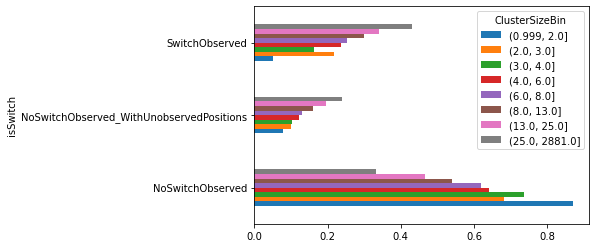

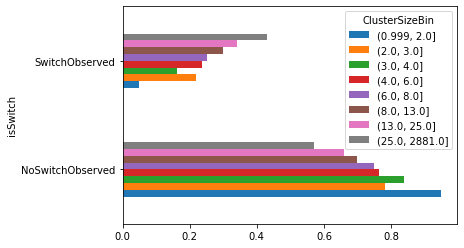

In [71]:
df.groupby("ClusterSizeBin").isSwitch.value_counts(normalize=True).unstack(0).plot.barh()

df2 = df.copy()
df2.loc[df2.isSwitch == "NoSwitchObserved_WithUnobservedPositions", 'isSwitch'] = "NoSwitchObserved"
df2.groupby("ClusterSizeBin").isSwitch.value_counts(normalize=True).unstack(0).plot.barh()
## TO INCLUDE

### Raw Counts binned by cluster size

<AxesSubplot:ylabel='isSwitch'>

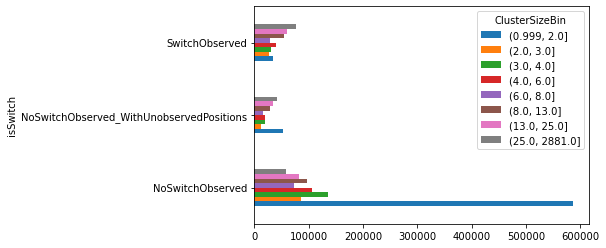

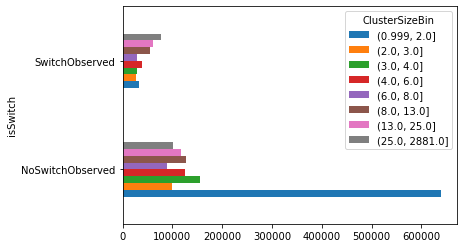

In [72]:

df.groupby("ClusterSizeBin").isSwitch.value_counts(normalize=False).unstack(0).plot.barh()
df2 = df.copy()
df2.loc[df2.isSwitch == "NoSwitchObserved_WithUnobservedPositions", 'isSwitch'] = "NoSwitchObserved"
df2.groupby("ClusterSizeBin").isSwitch.value_counts(normalize=False).unstack(0).plot.barh()


#### Notes on these figures
- Notes: Increasing cluster size does increase frequency of switches observed
- Conclusion: Cluster size is directly related to SwitchObserved Frequency
- Couterpoint Data: Cluster size == 3 (orange bar) has more switches than cluster size == 4 (green bar) 

### Average Cluster Size Stats

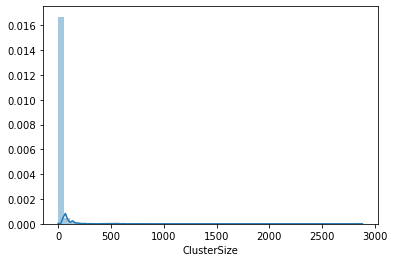

In [73]:
sns.distplot(a=df["ClusterSize"], axlabel="ClusterSize");

In [74]:
# ROUNDED TO NEAREST WHOLE NUMBER
df["ClusterSize"].astype(int).describe().round()

count    1805488.0
mean          12.0
std           36.0
min            1.0
25%            2.0
50%            4.0
75%           11.0
max         2881.0
Name: ClusterSize, dtype: float64

#### Notes
- Heavily weighted to smaller clusters

### Chains Stats

In [75]:
df["protein"].describe()

count     1805488
unique       8419
top        1i3q_A
freq         1733
Name: protein, dtype: object

In [76]:
# same but filter out cluster sizes < 2
df.loc[df.ClusterSize > 1, "protein"].describe()

count     1471493
unique       6465
top        1i3q_A
freq         1733
Name: protein, dtype: object

#### notes
- There are 8419 unique protein chains
    - of these, 6465 have clusters with at least 2 chains


### Relation between chain size and Observed switches

In [77]:
import numpy as np
df['ProteinLength'] = df.groupby('protein')['protein'].transform('size')

count    1805488.0
mean         345.0
std          242.0
min           13.0
25%          172.0
50%          290.0
75%          442.0
max         1733.0
Name: ProteinLength, dtype: float64

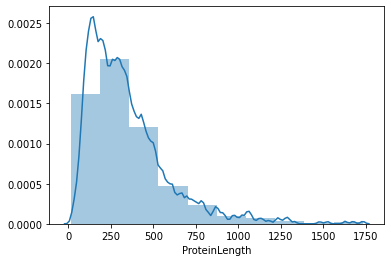

In [78]:
sns.distplot(a=df["ProteinLength"], bins=10);
df["ProteinLength"].describe().round()

In [79]:
df = df.join(other=df.loc[df["isSwitch"] == "SwitchObserved"].groupby('protein')['isSwitch'].count(),
             on="protein", rsuffix="_count")

# set NAN to zero
df.loc[df["isSwitch_count"].isna(), "isSwitch_count"] = 0 

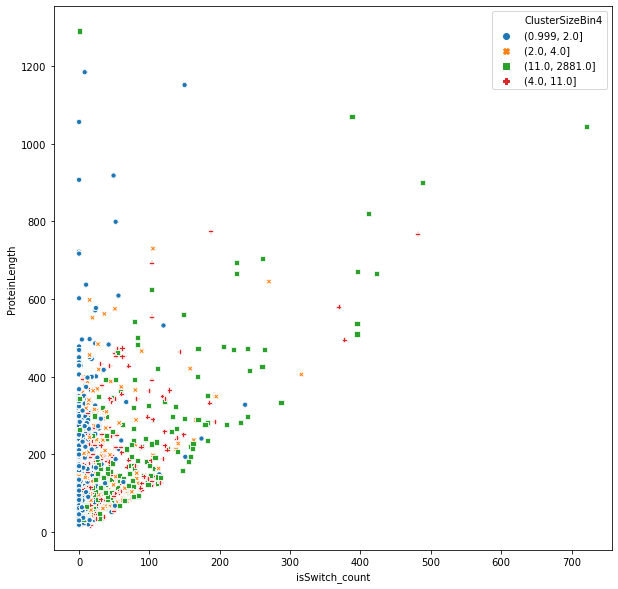

In [105]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,10))

df["ClusterSizeBin4"] = pd.qcut(df.ClusterSize, q=4, duplicates="drop")
sns.scatterplot(data=df[0:180548], x="isSwitch_count", y="ProteinLength", hue="ClusterSizeBin4", style="ClusterSizeBin4", s=26);

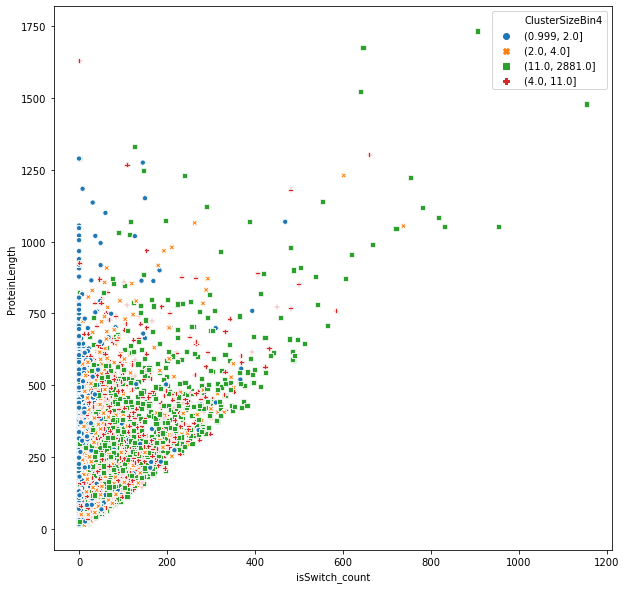

In [106]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,10))

df["ClusterSizeBin4"] = pd.qcut(df.ClusterSize, q=4, duplicates="drop")
sns.scatterplot(data=df, x="isSwitch_count", y="ProteinLength", hue="ClusterSizeBin4", style="ClusterSizeBin4", s=26);

#### notes:
- majority of chains fall betwen 450 and 170 residues in length

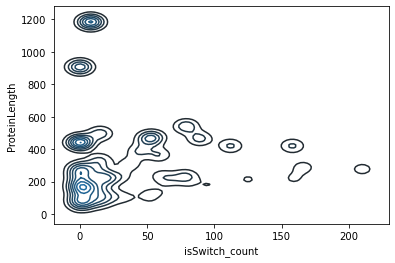

In [104]:
limit=18054
sns.kdeplot(data=df[0:limit]["isSwitch_count"], data2=df[0:limit]["ProteinLength"]);

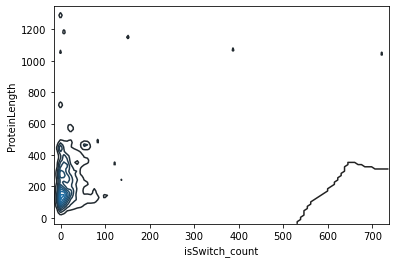

In [108]:
limit=180548
sns.kdeplot(data=df[0:limit]["isSwitch_count"], data2=df[0:limit]["ProteinLength"]);

In [107]:
len(df)

1805488

## Moving Forward
- Frequency based is switch
- include a single case with overlay of alignment and highlighted structural changes
- total frequency X within protein chain vs frequency OR count isSwitches

In [109]:
df.head()

,query_index,ClusterSize,isSwitch,X_count,H_count,B_count,E_count,G_count,I_count,T_count,...,E6,E20_alignments,E20,isunstruct,Residue,protein,ClusterSizeBin,ProteinLength,isSwitch_count,ClusterSizeBin4
0,1,1.0,NoSwitchObserved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,0.000000,0.992,M,1v4a_A,"(0.999, 2.0]",440,0.0,"(0.999, 2.0]"
1,2,1.0,NoSwitchObserved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK...,0.000000,0.975,K,1v4a_A,"(0.999, 2.0]",440,0.0,"(0.999, 2.0]"
2,3,1.0,NoSwitchObserved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.067069,PPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP...,0.067069,0.953,P,1v4a_A,"(0.999, 2.0]",440,0.0,"(0.999, 2.0]"
3,4,1.0,NoSwitchObserved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL...,0.000000,0.914,L,1v4a_A,"(0.999, 2.0]",440,0.0,"(0.999, 2.0]"
4,5,1.0,NoSwitchObserved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011408,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,0.011408,0.898,S,1v4a_A,"(0.999, 2.0]",440,0.0,"(0.999, 2.0]"
